In [2]:
#Importing Packages
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [3]:
seed=7

In [4]:
# Importing the dataset
dt = pd.read_excel('LUAD_clinical.xlsx',index_col=0)


In [5]:
dt.head(2)

,Diagnosis Age,Birth from Initial Pathologic Diagnosis Date,Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value,Fraction Genome Altered,Year Cancer Initial Diagnosis,Longest Dimension,Number of Samples Per Patient,Sample type id,Shortest Dimension,Specimen Second Longest Dimension,...,Tissue Source Site_NJ,Tissue Source Site_O1,Tissue Source Site_S2,Person Neoplasm Status_TUMOR FREE,Person Neoplasm Status_WITH TUMOR,Vial number_A,Vial number_B,Patient's Vital Status_Alive,Patient's Vital Status_Dead,Overall Survival (Months)2
Sample ID,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,70.0,-25752.0,0,0.456523,2009.0,1.1,1,1,0.3,0.9,...,0,0,0,1,0,1,0,1,0,0.00
TCGA-05-4249-01,67.0,-24532.0,0,0.222128,2007.0,1.4,1,1,0.4,0.8,...,0,0,0,1,0,1,0,1,0,50.03


In [6]:
del dt['Patient\'s Vital Status_Dead']
del dt['Patient\'s Vital Status_Alive']

In [7]:
X = dt.iloc[:,0:344].values
y = dt.iloc[:, -1].values

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.transform(X_val)

In [10]:
sc_y = StandardScaler()
y_train = np.squeeze(sc_y.fit_transform(y_train.reshape(-1, 1)))
y_val = np.squeeze(sc_y.transform(y_val.reshape(-1, 1)))
y_test = np.squeeze(sc_y.transform(y_test.reshape(-1, 1)))

In [51]:
def baseline_model():
 #create model
    model = Sequential()
    
    # The Input Layer:
    model.add(Dense(128, kernel_initializer='normal', input_dim = X_train.shape[1], activation='relu'))
    
    # The Hidden Layers:
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    
    # The Output Layer:
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    
    # Compile Model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
    return model

In [52]:
model = KerasRegressor(build_fn=baseline_model, batch_size=15, epochs=10, verbose=True)

In [34]:
kfold =KFold(n_splits=10, random_state=seed)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std())) 

Epoch 1/10
297/297 [==============================] - 0s 673us/sample - loss: 0.9665 - mean_absolute_error: 0.6287
Epoch 2/10
297/297 [==============================] - 0s 259us/sample - loss: 0.4521 - mean_absolute_error: 0.4537
Epoch 3/10
297/297 [==============================] - 0s 285us/sample - loss: 0.2138 - mean_absolute_error: 0.3385
Epoch 4/10
297/297 [==============================] - 0s 274us/sample - loss: 0.1193 - mean_absolute_error: 0.2463
Epoch 5/10
297/297 [==============================] - 0s 243us/sample - loss: 0.0858 - mean_absolute_error: 0.2148
Epoch 6/10
297/297 [==============================] - 0s 233us/sample - loss: 0.0620 - mean_absolute_error: 0.1906
Epoch 7/10
297/297 [==============================] - 0s 238us/sample - loss: 0.0522 - mean_absolute_error: 0.1541
Epoch 8/10
297/297 [==============================] - 0s 224us/sample - loss: 0.0303 - mean_absolute_error: 0.1253
Epoch 9/10
297/297 [==============================] - 0s 228us/sample - loss: 0.

Epoch 7/10
297/297 [==============================] - 0s 226us/sample - loss: 0.0593 - mean_absolute_error: 0.1695
Epoch 8/10
297/297 [==============================] - 0s 225us/sample - loss: 0.0341 - mean_absolute_error: 0.1268
Epoch 9/10
297/297 [==============================] - 0s 231us/sample - loss: 0.0233 - mean_absolute_error: 0.1055
Epoch 10/10
33/33 [==============================] - 0s 2ms/sample - loss: 0.5022 - mean_absolute_error: 0.5209
Epoch 1/10
297/297 [==============================] - 0s 671us/sample - loss: 1.0348 - mean_absolute_error: 0.6402
Epoch 2/10
297/297 [==============================] - 0s 223us/sample - loss: 0.6568 - mean_absolute_error: 0.5084
Epoch 3/10
297/297 [==============================] - 0s 229us/sample - loss: 0.2897 - mean_absolute_error: 0.3615
Epoch 4/10
297/297 [==============================] - ETA: 0s - loss: 0.1245 - mean_absolute_error: 0.272 - 0s 228us/sample - loss: 0.1179 - mean_absolute_error: 0.2675
Epoch 5/10
297/297 [=========

In [53]:
model.fit(X_train, y_train)

Epoch 1/10
330/330 [==============================] - 0s 636us/sample - loss: 0.9138 - mean_absolute_error: 0.6253
Epoch 2/10
330/330 [==============================] - 0s 261us/sample - loss: 0.5013 - mean_absolute_error: 0.4687
Epoch 3/10
330/330 [==============================] - 0s 254us/sample - loss: 0.2126 - mean_absolute_error: 0.3251
Epoch 4/10
330/330 [==============================] - 0s 247us/sample - loss: 0.1585 - mean_absolute_error: 0.2973
Epoch 5/10
330/330 [==============================] - 0s 244us/sample - loss: 0.0983 - mean_absolute_error: 0.2383
Epoch 6/10
330/330 [==============================] - 0s 248us/sample - loss: 0.0715 - mean_absolute_error: 0.1905
Epoch 7/10
330/330 [==============================] - 0s 237us/sample - loss: 0.0477 - mean_absolute_error: 0.1550
Epoch 8/10
330/330 [==============================] - 0s 235us/sample - loss: 0.0282 - mean_absolute_error: 0.1181
Epoch 9/10
330/330 [==============================] - 0s 234us/sample - loss: 0.

In [54]:
y_predval = model.predict(X_val)

83/83 [==============================] - 0s 243us/sample


In [55]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

from sklearn.metrics import r2_score
accuracy=r2_score(y_val,y_predval)

print('R2 Score')
print(accuracy)

0.556270868972482
0.640763234588095
0.8004768794837831
R2 Score
0.10122796709009063


In [56]:
# Visualising the Decision Tree Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

In [57]:
# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

In [58]:
# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

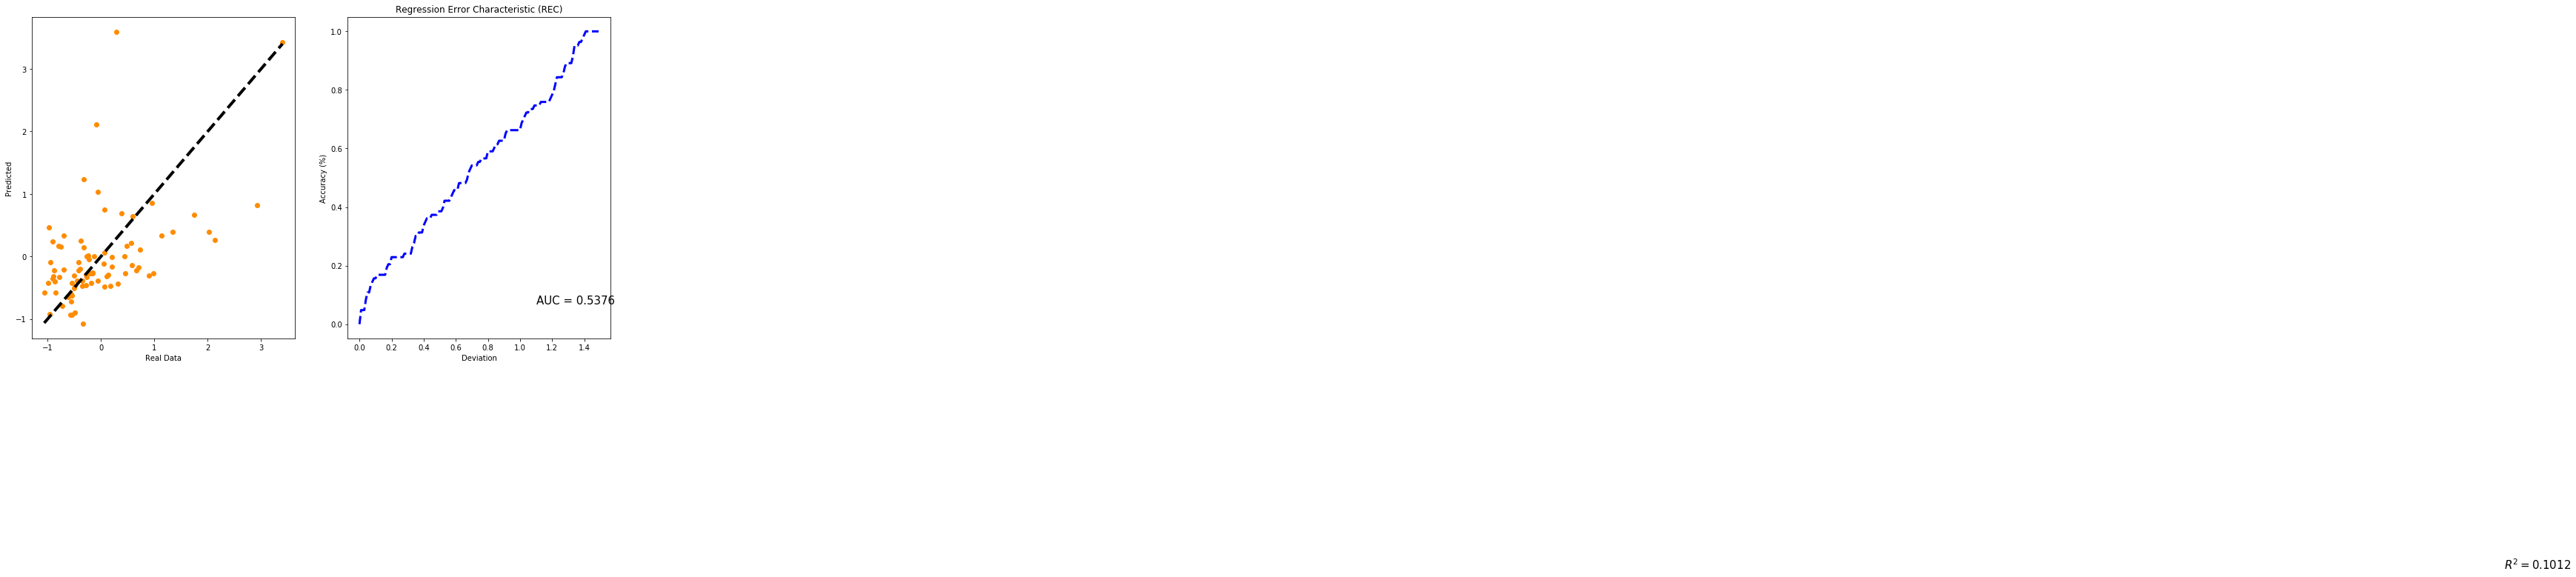

In [59]:
# Plotting
plt.figure(figsize=(14 , 8))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
plt.text(45, -5, r"$R^2 = %0.4f$" %RR , fontsize=15)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()

In [22]:
# define the grid search paramerters
batch_size = [5, 10, 15, 20,25,30]
epochs = [10, 20, 30, 40,50,100]

In [23]:
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)

/Users/Zayeem/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
220/220 [==============================] - 0s 1ms/sample - loss: 0.9646 - mean_absolute_error: 0.6168
Epoch 2/10
220/220 [==============================] - 0s 392us/sample - loss: 0.4533 - mean_absolute_error: 0.4334
Epoch 3/10
220/220 [==============================] - 0s 435us/sample - loss: 0.2946 - mean_absolute_error: 0.3825
Epoch 4/10
220/220 [==============================] - 0s 413us/sample - loss: 0.2072 - mean_absolute_error: 0.3002
Epoch 5/10
220/220 [==============================] - 0s 418us/sample - loss: 0.0684 - mean_absolute_error: 0.1811
Epoch 6/10
220/220 [==============================] - 0s 445us/sample - loss: 0.0357 - mean_absolute_error: 0.1310
Epoch 7/10
220/220 [==============================] - 0s 437us/sample - loss: 0.0247 - mean_absolute_error: 0.1100
Epoch 8/10
220/220 [==============================] - 0s 454us/sample - loss: 0.0232 - mean_absolute_error: 0.1080
Epoch 9/10
220/220 [==============================] - 0s 429us/sample - loss: 0.02

220/220 [==============================] - 0s 430us/sample - loss: 0.0098 - mean_absolute_error: 0.0645
Epoch 15/20
220/220 [==============================] - 0s 392us/sample - loss: 0.0122 - mean_absolute_error: 0.0721
Epoch 16/20
220/220 [==============================] - 0s 388us/sample - loss: 0.0110 - mean_absolute_error: 0.0664
Epoch 17/20
220/220 [==============================] - 0s 409us/sample - loss: 0.0117 - mean_absolute_error: 0.0689
Epoch 18/20
220/220 [==============================] - 0s 384us/sample - loss: 0.0168 - mean_absolute_error: 0.0814
Epoch 19/20
220/220 [==============================] - 0s 388us/sample - loss: 0.0132 - mean_absolute_error: 0.0754
Epoch 20/20
220/220 [==============================] - 0s 150us/sample - loss: 0.0090 - mean_absolute_error: 0.0681
Epoch 1/20
220/220 [==============================] - 0s 959us/sample - loss: 1.2222 - mean_absolute_error: 0.7234
Epoch 2/20
220/220 [==============================] - 0s 460us/sample - loss: 0.5053 

220/220 [==============================] - 0s 408us/sample - loss: 0.0190 - mean_absolute_error: 0.0959
Epoch 10/30
220/220 [==============================] - 0s 388us/sample - loss: 0.0265 - mean_absolute_error: 0.1006
Epoch 11/30
220/220 [==============================] - 0s 390us/sample - loss: 0.0406 - mean_absolute_error: 0.1051
Epoch 12/30
220/220 [==============================] - 0s 395us/sample - loss: 0.0286 - mean_absolute_error: 0.1110
Epoch 13/30
220/220 [==============================] - 0s 403us/sample - loss: 0.0344 - mean_absolute_error: 0.1187
Epoch 14/30
220/220 [==============================] - 0s 400us/sample - loss: 0.0507 - mean_absolute_error: 0.1381
Epoch 15/30
220/220 [==============================] - 0s 404us/sample - loss: 0.0348 - mean_absolute_error: 0.1224
Epoch 16/30
220/220 [==============================] - 0s 390us/sample - loss: 0.0403 - mean_absolute_error: 0.1264
Epoch 17/30
220/220 [==============================] - 0s 416us/sample - loss: 0.030

220/220 [==============================] - 0s 421us/sample - loss: 0.0615 - mean_absolute_error: 0.1461
Epoch 17/40
220/220 [==============================] - 0s 389us/sample - loss: 0.0236 - mean_absolute_error: 0.1033
Epoch 18/40
220/220 [==============================] - 0s 399us/sample - loss: 0.0097 - mean_absolute_error: 0.0748
Epoch 19/40
220/220 [==============================] - 0s 384us/sample - loss: 0.0055 - mean_absolute_error: 0.0509
Epoch 20/40
220/220 [==============================] - 0s 402us/sample - loss: 0.0081 - mean_absolute_error: 0.0572
Epoch 21/40
220/220 [==============================] - 0s 396us/sample - loss: 0.0092 - mean_absolute_error: 0.0592
Epoch 22/40
220/220 [==============================] - 0s 395us/sample - loss: 0.0135 - mean_absolute_error: 0.0659
Epoch 23/40
220/220 [==============================] - 0s 405us/sample - loss: 0.0760 - mean_absolute_error: 0.1256
Epoch 24/40
220/220 [==============================] - 0s 406us/sample - loss: 0.177

220/220 [==============================] - 0s 367us/sample - loss: 0.3353 - mean_absolute_error: 0.3956
Epoch 4/40
220/220 [==============================] - 0s 418us/sample - loss: 0.1812 - mean_absolute_error: 0.2871
Epoch 5/40
220/220 [==============================] - 0s 411us/sample - loss: 0.1207 - mean_absolute_error: 0.2374
Epoch 6/40
220/220 [==============================] - 0s 413us/sample - loss: 0.0798 - mean_absolute_error: 0.1867
Epoch 7/40
220/220 [==============================] - 0s 410us/sample - loss: 0.0527 - mean_absolute_error: 0.1506
Epoch 8/40
220/220 [==============================] - 0s 417us/sample - loss: 0.0329 - mean_absolute_error: 0.1295
Epoch 9/40
220/220 [==============================] - 0s 414us/sample - loss: 0.0203 - mean_absolute_error: 0.1044
Epoch 10/40
220/220 [==============================] - 0s 387us/sample - loss: 0.0157 - mean_absolute_error: 0.0867
Epoch 11/40
220/220 [==============================] - 0s 374us/sample - loss: 0.0140 - me

220/220 [==============================] - 0s 392us/sample - loss: 0.0871 - mean_absolute_error: 0.1422
Epoch 33/50
220/220 [==============================] - 0s 392us/sample - loss: 0.0539 - mean_absolute_error: 0.1439
Epoch 34/50
220/220 [==============================] - 0s 384us/sample - loss: 0.0379 - mean_absolute_error: 0.1233
Epoch 35/50
220/220 [==============================] - 0s 390us/sample - loss: 0.0256 - mean_absolute_error: 0.0939
Epoch 36/50
220/220 [==============================] - 0s 401us/sample - loss: 0.0192 - mean_absolute_error: 0.0777
Epoch 37/50
220/220 [==============================] - 0s 391us/sample - loss: 0.0395 - mean_absolute_error: 0.0996
Epoch 38/50
220/220 [==============================] - 0s 402us/sample - loss: 0.0299 - mean_absolute_error: 0.0818
Epoch 39/50
220/220 [==============================] - 0s 399us/sample - loss: 0.0244 - mean_absolute_error: 0.0753
Epoch 40/50
220/220 [==============================] - 0s 390us/sample - loss: 0.013

220/220 [==============================] - 0s 153us/sample - loss: 0.0210 - mean_absolute_error: 0.0922
Epoch 1/50
220/220 [==============================] - 0s 997us/sample - loss: 1.2326 - mean_absolute_error: 0.7185
Epoch 2/50
220/220 [==============================] - 0s 410us/sample - loss: 0.5716 - mean_absolute_error: 0.5126
Epoch 3/50
220/220 [==============================] - 0s 380us/sample - loss: 0.2582 - mean_absolute_error: 0.3602
Epoch 4/50
220/220 [==============================] - 0s 399us/sample - loss: 0.2074 - mean_absolute_error: 0.3154
Epoch 5/50
220/220 [==============================] - 0s 417us/sample - loss: 0.2090 - mean_absolute_error: 0.2720
Epoch 6/50
220/220 [==============================] - 0s 380us/sample - loss: 0.1387 - mean_absolute_error: 0.2222
Epoch 7/50
220/220 [==============================] - 0s 400us/sample - loss: 0.0649 - mean_absolute_error: 0.1626
Epoch 8/50
220/220 [==============================] - 0s 364us/sample - loss: 0.0218 - mean

220/220 [==============================] - 0s 357us/sample - loss: 0.0032 - mean_absolute_error: 0.0404
Epoch 18/100
220/220 [==============================] - 0s 367us/sample - loss: 0.0037 - mean_absolute_error: 0.0409
Epoch 19/100
220/220 [==============================] - 0s 347us/sample - loss: 0.0031 - mean_absolute_error: 0.0399
Epoch 20/100
220/220 [==============================] - 0s 420us/sample - loss: 0.0029 - mean_absolute_error: 0.0380
Epoch 21/100
220/220 [==============================] - 0s 435us/sample - loss: 0.0027 - mean_absolute_error: 0.0379
Epoch 22/100
220/220 [==============================] - 0s 424us/sample - loss: 0.0053 - mean_absolute_error: 0.0475
Epoch 23/100
220/220 [==============================] - 0s 437us/sample - loss: 0.0145 - mean_absolute_error: 0.0679
Epoch 24/100
220/220 [==============================] - 0s 458us/sample - loss: 0.0329 - mean_absolute_error: 0.1060
Epoch 25/100
220/220 [==============================] - 0s 428us/sample - los

Epoch 87/100
220/220 [==============================] - 0s 403us/sample - loss: 0.0207 - mean_absolute_error: 0.0591
Epoch 88/100
220/220 [==============================] - 0s 429us/sample - loss: 0.0135 - mean_absolute_error: 0.0476
Epoch 89/100
220/220 [==============================] - 0s 394us/sample - loss: 0.0487 - mean_absolute_error: 0.0867
Epoch 90/100
220/220 [==============================] - 0s 403us/sample - loss: 0.0149 - mean_absolute_error: 0.0645
Epoch 91/100
220/220 [==============================] - 0s 396us/sample - loss: 0.0048 - mean_absolute_error: 0.0423
Epoch 92/100
220/220 [==============================] - 0s 394us/sample - loss: 0.0025 - mean_absolute_error: 0.0297
Epoch 93/100
220/220 [==============================] - 0s 381us/sample - loss: 0.0049 - mean_absolute_error: 0.0355
Epoch 94/100
220/220 [==============================] - 0s 391us/sample - loss: 0.0036 - mean_absolute_error: 0.0330
Epoch 95/100
220/220 [==============================] - 0s 367us

220/220 [==============================] - 0s 355us/sample - loss: 0.0062 - mean_absolute_error: 0.0603
Epoch 56/100
220/220 [==============================] - 0s 362us/sample - loss: 0.0070 - mean_absolute_error: 0.0568
Epoch 57/100
220/220 [==============================] - 0s 356us/sample - loss: 0.0047 - mean_absolute_error: 0.0415
Epoch 58/100
220/220 [==============================] - 0s 339us/sample - loss: 0.0043 - mean_absolute_error: 0.0427
Epoch 59/100
220/220 [==============================] - 0s 348us/sample - loss: 0.0094 - mean_absolute_error: 0.0491
Epoch 60/100
220/220 [==============================] - 0s 338us/sample - loss: 0.0166 - mean_absolute_error: 0.0568
Epoch 61/100
220/220 [==============================] - 0s 337us/sample - loss: 0.0087 - mean_absolute_error: 0.0540
Epoch 62/100
220/220 [==============================] - 0s 347us/sample - loss: 0.0030 - mean_absolute_error: 0.0389
Epoch 63/100
220/220 [==============================] - 0s 341us/sample - los

220/220 [==============================] - 0s 375us/sample - loss: 0.0447 - mean_absolute_error: 0.1176
Epoch 24/100
220/220 [==============================] - 0s 365us/sample - loss: 0.0506 - mean_absolute_error: 0.1283
Epoch 25/100
220/220 [==============================] - 0s 389us/sample - loss: 0.0279 - mean_absolute_error: 0.1014
Epoch 26/100
220/220 [==============================] - 0s 436us/sample - loss: 0.0252 - mean_absolute_error: 0.0966
Epoch 27/100
220/220 [==============================] - 0s 437us/sample - loss: 0.0229 - mean_absolute_error: 0.0957
Epoch 28/100
220/220 [==============================] - 0s 386us/sample - loss: 0.0411 - mean_absolute_error: 0.1164
Epoch 29/100
220/220 [==============================] - 0s 360us/sample - loss: 0.0775 - mean_absolute_error: 0.1443
Epoch 30/100
220/220 [==============================] - 0s 352us/sample - loss: 0.1245 - mean_absolute_error: 0.1673
Epoch 31/100
220/220 [==============================] - 0s 356us/sample - los

220/220 [==============================] - 0s 392us/sample - loss: 0.0037 - mean_absolute_error: 0.0338
Epoch 94/100
220/220 [==============================] - 0s 377us/sample - loss: 0.0018 - mean_absolute_error: 0.0270
Epoch 95/100
220/220 [==============================] - 0s 373us/sample - loss: 0.0027 - mean_absolute_error: 0.0305
Epoch 96/100
220/220 [==============================] - 0s 355us/sample - loss: 0.0036 - mean_absolute_error: 0.0391
Epoch 97/100
220/220 [==============================] - 0s 363us/sample - loss: 0.0097 - mean_absolute_error: 0.0482
Epoch 98/100
220/220 [==============================] - 0s 357us/sample - loss: 0.0173 - mean_absolute_error: 0.0594
Epoch 99/100
220/220 [==============================] - 0s 404us/sample - loss: 0.0186 - mean_absolute_error: 0.0676
Epoch 100/100
220/220 [==============================] - 0s 131us/sample - loss: 0.0164 - mean_absolute_error: 0.0776
Epoch 1/10
220/220 [==============================] - 0s 724us/sample - loss

220/220 [==============================] - 0s 193us/sample - loss: 0.0641 - mean_absolute_error: 0.1892
Epoch 6/20
220/220 [==============================] - 0s 206us/sample - loss: 0.0464 - mean_absolute_error: 0.1573
Epoch 7/20
220/220 [==============================] - 0s 190us/sample - loss: 0.0316 - mean_absolute_error: 0.1190
Epoch 8/20
220/220 [==============================] - 0s 184us/sample - loss: 0.0151 - mean_absolute_error: 0.0844
Epoch 9/20
220/220 [==============================] - 0s 192us/sample - loss: 0.0105 - mean_absolute_error: 0.0715
Epoch 10/20
220/220 [==============================] - 0s 193us/sample - loss: 0.0105 - mean_absolute_error: 0.0550
Epoch 11/20
220/220 [==============================] - 0s 194us/sample - loss: 0.0055 - mean_absolute_error: 0.0463
Epoch 12/20
220/220 [==============================] - 0s 192us/sample - loss: 0.0038 - mean_absolute_error: 0.0384
Epoch 13/20
220/220 [==============================] - 0s 186us/sample - loss: 0.0043 - 

220/220 [==============================] - 0s 76us/sample - loss: 0.0140 - mean_absolute_error: 0.0618
Epoch 1/30
220/220 [==============================] - 0s 829us/sample - loss: 0.6889 - mean_absolute_error: 0.5618
Epoch 2/30
220/220 [==============================] - 0s 246us/sample - loss: 0.3991 - mean_absolute_error: 0.4483
Epoch 3/30
220/220 [==============================] - 0s 244us/sample - loss: 0.1507 - mean_absolute_error: 0.2744
Epoch 4/30
220/220 [==============================] - 0s 239us/sample - loss: 0.1088 - mean_absolute_error: 0.2412
Epoch 5/30
220/220 [==============================] - 0s 232us/sample - loss: 0.0724 - mean_absolute_error: 0.1930
Epoch 6/30
220/220 [==============================] - 0s 248us/sample - loss: 0.0359 - mean_absolute_error: 0.1404
Epoch 7/30
220/220 [==============================] - 0s 233us/sample - loss: 0.0222 - mean_absolute_error: 0.1140
Epoch 8/30
220/220 [==============================] - 0s 233us/sample - loss: 0.0190 - mean_

220/220 [==============================] - 0s 219us/sample - loss: 0.0511 - mean_absolute_error: 0.1716
Epoch 8/40
220/220 [==============================] - 0s 222us/sample - loss: 0.0282 - mean_absolute_error: 0.1183
Epoch 9/40
220/220 [==============================] - 0s 241us/sample - loss: 0.0148 - mean_absolute_error: 0.0846
Epoch 10/40
220/220 [==============================] - 0s 253us/sample - loss: 0.0048 - mean_absolute_error: 0.0488
Epoch 11/40
220/220 [==============================] - 0s 256us/sample - loss: 0.0037 - mean_absolute_error: 0.0414
Epoch 12/40
220/220 [==============================] - 0s 234us/sample - loss: 0.0040 - mean_absolute_error: 0.0438
Epoch 13/40
220/220 [==============================] - 0s 212us/sample - loss: 0.0086 - mean_absolute_error: 0.0568
Epoch 14/40
220/220 [==============================] - 0s 199us/sample - loss: 0.0187 - mean_absolute_error: 0.0747
Epoch 15/40
220/220 [==============================] - 0s 198us/sample - loss: 0.0216 

220/220 [==============================] - 0s 187us/sample - loss: 0.0331 - mean_absolute_error: 0.1289
Epoch 37/40
220/220 [==============================] - 0s 196us/sample - loss: 0.0254 - mean_absolute_error: 0.1100
Epoch 38/40
220/220 [==============================] - 0s 208us/sample - loss: 0.0101 - mean_absolute_error: 0.0674
Epoch 39/40
220/220 [==============================] - 0s 197us/sample - loss: 0.0043 - mean_absolute_error: 0.0453
Epoch 40/40
220/220 [==============================] - 0s 85us/sample - loss: 0.0010 - mean_absolute_error: 0.0244
Epoch 1/40
220/220 [==============================] - 0s 797us/sample - loss: 1.2399 - mean_absolute_error: 0.7150
Epoch 2/40
220/220 [==============================] - 0s 187us/sample - loss: 0.5977 - mean_absolute_error: 0.5175
Epoch 3/40
220/220 [==============================] - 0s 201us/sample - loss: 0.2077 - mean_absolute_error: 0.3278
Epoch 4/40
220/220 [==============================] - 0s 201us/sample - loss: 0.1428 - m

220/220 [==============================] - 0s 252us/sample - loss: 0.0051 - mean_absolute_error: 0.0424
Epoch 24/50
220/220 [==============================] - 0s 214us/sample - loss: 0.0217 - mean_absolute_error: 0.0706
Epoch 25/50
220/220 [==============================] - 0s 209us/sample - loss: 0.0276 - mean_absolute_error: 0.0806
Epoch 26/50
220/220 [==============================] - 0s 192us/sample - loss: 0.0267 - mean_absolute_error: 0.0899
Epoch 27/50
220/220 [==============================] - 0s 203us/sample - loss: 0.0265 - mean_absolute_error: 0.0964
Epoch 28/50
220/220 [==============================] - 0s 202us/sample - loss: 0.0315 - mean_absolute_error: 0.0975
Epoch 29/50
220/220 [==============================] - 0s 192us/sample - loss: 0.0360 - mean_absolute_error: 0.1125
Epoch 30/50
220/220 [==============================] - 0s 205us/sample - loss: 0.0238 - mean_absolute_error: 0.0929
Epoch 31/50
220/220 [==============================] - 0s 201us/sample - loss: 0.025

Epoch 42/50
220/220 [==============================] - 0s 214us/sample - loss: 0.0041 - mean_absolute_error: 0.0382
Epoch 43/50
220/220 [==============================] - 0s 212us/sample - loss: 0.0046 - mean_absolute_error: 0.0431
Epoch 44/50
220/220 [==============================] - 0s 206us/sample - loss: 0.0027 - mean_absolute_error: 0.0341
Epoch 45/50
220/220 [==============================] - 0s 213us/sample - loss: 0.0021 - mean_absolute_error: 0.0253
Epoch 46/50
220/220 [==============================] - 0s 213us/sample - loss: 0.0014 - mean_absolute_error: 0.0215
Epoch 47/50
220/220 [==============================] - 0s 214us/sample - loss: 0.0011 - mean_absolute_error: 0.0205
Epoch 48/50
220/220 [==============================] - 0s 212us/sample - loss: 0.0011 - mean_absolute_error: 0.0199
Epoch 49/50
220/220 [==============================] - 0s 214us/sample - loss: 0.0013 - mean_absolute_error: 0.0215
Epoch 50/50
220/220 [==============================] - 0s 79us/sample - 

220/220 [==============================] - 0s 193us/sample - loss: 0.0468 - mean_absolute_error: 0.1341
Epoch 10/100
220/220 [==============================] - 0s 190us/sample - loss: 0.0349 - mean_absolute_error: 0.1432
Epoch 11/100
220/220 [==============================] - 0s 208us/sample - loss: 0.0324 - mean_absolute_error: 0.1202
Epoch 12/100
220/220 [==============================] - 0s 213us/sample - loss: 0.0557 - mean_absolute_error: 0.1265
Epoch 13/100
220/220 [==============================] - 0s 196us/sample - loss: 0.0644 - mean_absolute_error: 0.1222
Epoch 14/100
220/220 [==============================] - 0s 205us/sample - loss: 0.0503 - mean_absolute_error: 0.1427
Epoch 15/100
220/220 [==============================] - 0s 219us/sample - loss: 0.0373 - mean_absolute_error: 0.1106
Epoch 16/100
220/220 [==============================] - 0s 248us/sample - loss: 0.0266 - mean_absolute_error: 0.1021
Epoch 17/100
220/220 [==============================] - 0s 221us/sample - los

220/220 [==============================] - 0s 228us/sample - loss: 6.6112e-05 - mean_absolute_error: 0.0050
Epoch 79/100
220/220 [==============================] - 0s 236us/sample - loss: 2.2164e-04 - mean_absolute_error: 0.0061
Epoch 80/100
220/220 [==============================] - 0s 210us/sample - loss: 4.3266e-04 - mean_absolute_error: 0.0088
Epoch 81/100
220/220 [==============================] - 0s 213us/sample - loss: 3.0660e-04 - mean_absolute_error: 0.0085
Epoch 82/100
220/220 [==============================] - 0s 215us/sample - loss: 9.3970e-05 - mean_absolute_error: 0.0060
Epoch 83/100
220/220 [==============================] - 0s 213us/sample - loss: 9.4799e-05 - mean_absolute_error: 0.0058
Epoch 84/100
220/220 [==============================] - 0s 212us/sample - loss: 3.8136e-04 - mean_absolute_error: 0.0094
Epoch 85/100
220/220 [==============================] - 0s 216us/sample - loss: 4.6855e-04 - mean_absolute_error: 0.0111
Epoch 86/100
220/220 [=======================

220/220 [==============================] - 0s 201us/sample - loss: 6.5178e-04 - mean_absolute_error: 0.0171
Epoch 47/100
220/220 [==============================] - 0s 219us/sample - loss: 3.0292e-04 - mean_absolute_error: 0.0130
Epoch 48/100
220/220 [==============================] - 0s 213us/sample - loss: 1.9389e-04 - mean_absolute_error: 0.0112
Epoch 49/100
220/220 [==============================] - 0s 215us/sample - loss: 1.2332e-04 - mean_absolute_error: 0.0084
Epoch 50/100
220/220 [==============================] - 0s 213us/sample - loss: 6.1965e-05 - mean_absolute_error: 0.0056
Epoch 51/100
220/220 [==============================] - 0s 207us/sample - loss: 4.9238e-05 - mean_absolute_error: 0.0048
Epoch 52/100
220/220 [==============================] - 0s 203us/sample - loss: 3.8337e-05 - mean_absolute_error: 0.0043
Epoch 53/100
220/220 [==============================] - 0s 210us/sample - loss: 2.5417e-05 - mean_absolute_error: 0.0035
Epoch 54/100
220/220 [=======================

220/220 [==============================] - 0s 198us/sample - loss: 0.0059 - mean_absolute_error: 0.0497
Epoch 14/100
220/220 [==============================] - 0s 196us/sample - loss: 0.0074 - mean_absolute_error: 0.0565
Epoch 15/100
220/220 [==============================] - 0s 192us/sample - loss: 0.0059 - mean_absolute_error: 0.0508
Epoch 16/100
220/220 [==============================] - 0s 190us/sample - loss: 0.0068 - mean_absolute_error: 0.0569
Epoch 17/100
220/220 [==============================] - 0s 187us/sample - loss: 0.0092 - mean_absolute_error: 0.0640
Epoch 18/100
220/220 [==============================] - 0s 195us/sample - loss: 0.0121 - mean_absolute_error: 0.0683
Epoch 19/100
220/220 [==============================] - 0s 194us/sample - loss: 0.0149 - mean_absolute_error: 0.0762
Epoch 20/100
220/220 [==============================] - 0s 198us/sample - loss: 0.0120 - mean_absolute_error: 0.0721
Epoch 21/100
220/220 [==============================] - 0s 200us/sample - los

220/220 [==============================] - 0s 214us/sample - loss: 0.0799 - mean_absolute_error: 0.2233
Epoch 83/100
220/220 [==============================] - 0s 224us/sample - loss: 0.0519 - mean_absolute_error: 0.1697
Epoch 84/100
220/220 [==============================] - 0s 216us/sample - loss: 0.0329 - mean_absolute_error: 0.1222
Epoch 85/100
220/220 [==============================] - 0s 211us/sample - loss: 0.0365 - mean_absolute_error: 0.1199
Epoch 86/100
220/220 [==============================] - 0s 211us/sample - loss: 0.0791 - mean_absolute_error: 0.1626
Epoch 87/100
220/220 [==============================] - 0s 207us/sample - loss: 0.0730 - mean_absolute_error: 0.1361
Epoch 88/100
220/220 [==============================] - 0s 208us/sample - loss: 0.0435 - mean_absolute_error: 0.1207
Epoch 89/100
220/220 [==============================] - 0s 212us/sample - loss: 0.0267 - mean_absolute_error: 0.0974
Epoch 90/100
220/220 [==============================] - 0s 212us/sample - los

220/220 [==============================] - 0s 145us/sample - loss: 0.0069 - mean_absolute_error: 0.0584
Epoch 16/20
220/220 [==============================] - 0s 143us/sample - loss: 0.0083 - mean_absolute_error: 0.0618
Epoch 17/20
220/220 [==============================] - 0s 144us/sample - loss: 0.0039 - mean_absolute_error: 0.0436
Epoch 18/20
220/220 [==============================] - 0s 145us/sample - loss: 0.0056 - mean_absolute_error: 0.0418
Epoch 19/20
220/220 [==============================] - 0s 140us/sample - loss: 0.0052 - mean_absolute_error: 0.0434
Epoch 20/20
220/220 [==============================] - 0s 60us/sample - loss: 0.0079 - mean_absolute_error: 0.0673
Epoch 1/20
220/220 [==============================] - 0s 679us/sample - loss: 0.6848 - mean_absolute_error: 0.5787
Epoch 2/20
220/220 [==============================] - 0s 153us/sample - loss: 0.3896 - mean_absolute_error: 0.4357
Epoch 3/20
220/220 [==============================] - 0s 155us/sample - loss: 0.1747 - 

220/220 [==============================] - 0s 133us/sample - loss: 6.5790e-04 - mean_absolute_error: 0.0149
Epoch 21/30
220/220 [==============================] - 0s 130us/sample - loss: 8.4800e-04 - mean_absolute_error: 0.0160
Epoch 22/30
220/220 [==============================] - 0s 130us/sample - loss: 7.6317e-04 - mean_absolute_error: 0.0174
Epoch 23/30
220/220 [==============================] - 0s 145us/sample - loss: 7.8110e-04 - mean_absolute_error: 0.0170
Epoch 24/30
220/220 [==============================] - 0s 136us/sample - loss: 8.0405e-04 - mean_absolute_error: 0.0161
Epoch 25/30
220/220 [==============================] - 0s 153us/sample - loss: 5.9174e-04 - mean_absolute_error: 0.0150
Epoch 26/30
220/220 [==============================] - 0s 140us/sample - loss: 5.2020e-04 - mean_absolute_error: 0.0138
Epoch 27/30
220/220 [==============================] - 0s 144us/sample - loss: 5.5702e-04 - mean_absolute_error: 0.0141
Epoch 28/30
220/220 [==============================]

220/220 [==============================] - 0s 153us/sample - loss: 0.0134 - mean_absolute_error: 0.0676
Epoch 27/30
220/220 [==============================] - 0s 148us/sample - loss: 0.0109 - mean_absolute_error: 0.0706
Epoch 28/30
220/220 [==============================] - 0s 161us/sample - loss: 0.0078 - mean_absolute_error: 0.0644
Epoch 29/30
220/220 [==============================] - 0s 150us/sample - loss: 0.0061 - mean_absolute_error: 0.0543
Epoch 30/30
220/220 [==============================] - 0s 58us/sample - loss: 0.0038 - mean_absolute_error: 0.0320
Epoch 1/40
220/220 [==============================] - 0s 785us/sample - loss: 1.0062 - mean_absolute_error: 0.6311
Epoch 2/40
220/220 [==============================] - 0s 172us/sample - loss: 0.6860 - mean_absolute_error: 0.4977
Epoch 3/40
220/220 [==============================] - 0s 163us/sample - loss: 0.3360 - mean_absolute_error: 0.3697
Epoch 4/40
220/220 [==============================] - 0s 156us/sample - loss: 0.1132 - m

220/220 [==============================] - 0s 157us/sample - loss: 0.0026 - mean_absolute_error: 0.0383
Epoch 24/40
220/220 [==============================] - 0s 146us/sample - loss: 0.0018 - mean_absolute_error: 0.0304
Epoch 25/40
220/220 [==============================] - 0s 142us/sample - loss: 0.0017 - mean_absolute_error: 0.0275
Epoch 26/40
220/220 [==============================] - 0s 153us/sample - loss: 0.0013 - mean_absolute_error: 0.0205
Epoch 27/40
220/220 [==============================] - 0s 151us/sample - loss: 0.0011 - mean_absolute_error: 0.0225
Epoch 28/40
220/220 [==============================] - 0s 151us/sample - loss: 8.1252e-04 - mean_absolute_error: 0.0198
Epoch 29/40
220/220 [==============================] - 0s 152us/sample - loss: 8.2798e-04 - mean_absolute_error: 0.0177
Epoch 30/40
220/220 [==============================] - 0s 149us/sample - loss: 0.0012 - mean_absolute_error: 0.0209
Epoch 31/40
220/220 [==============================] - 0s 146us/sample - los

220/220 [==============================] - 0s 147us/sample - loss: 0.0182 - mean_absolute_error: 0.0955
Epoch 11/50
220/220 [==============================] - 0s 165us/sample - loss: 0.0125 - mean_absolute_error: 0.0811
Epoch 12/50
220/220 [==============================] - 0s 158us/sample - loss: 0.0101 - mean_absolute_error: 0.0726
Epoch 13/50
220/220 [==============================] - 0s 158us/sample - loss: 0.0097 - mean_absolute_error: 0.0711
Epoch 14/50
220/220 [==============================] - 0s 159us/sample - loss: 0.0045 - mean_absolute_error: 0.0504
Epoch 15/50
220/220 [==============================] - 0s 154us/sample - loss: 0.0026 - mean_absolute_error: 0.0348
Epoch 16/50
220/220 [==============================] - 0s 149us/sample - loss: 0.0016 - mean_absolute_error: 0.0271
Epoch 17/50
220/220 [==============================] - 0s 149us/sample - loss: 9.1885e-04 - mean_absolute_error: 0.0191
Epoch 18/50
220/220 [==============================] - 0s 149us/sample - loss: 8

220/220 [==============================] - 0s 174us/sample - loss: 0.0098 - mean_absolute_error: 0.0679
Epoch 29/50
220/220 [==============================] - 0s 167us/sample - loss: 0.0088 - mean_absolute_error: 0.0633
Epoch 30/50
220/220 [==============================] - 0s 167us/sample - loss: 0.0049 - mean_absolute_error: 0.0490
Epoch 31/50
220/220 [==============================] - 0s 171us/sample - loss: 0.0040 - mean_absolute_error: 0.0475
Epoch 32/50
220/220 [==============================] - 0s 161us/sample - loss: 0.0030 - mean_absolute_error: 0.0388
Epoch 33/50
220/220 [==============================] - 0s 162us/sample - loss: 0.0023 - mean_absolute_error: 0.0321
Epoch 34/50
220/220 [==============================] - 0s 161us/sample - loss: 0.0015 - mean_absolute_error: 0.0249
Epoch 35/50
220/220 [==============================] - 0s 153us/sample - loss: 0.0013 - mean_absolute_error: 0.0235
Epoch 36/50
220/220 [==============================] - 0s 154us/sample - loss: 0.001

220/220 [==============================] - 0s 167us/sample - loss: 9.8458e-04 - mean_absolute_error: 0.0188
Epoch 47/50
220/220 [==============================] - 0s 157us/sample - loss: 0.0012 - mean_absolute_error: 0.0199
Epoch 48/50
220/220 [==============================] - 0s 167us/sample - loss: 0.0015 - mean_absolute_error: 0.0200
Epoch 49/50
220/220 [==============================] - 0s 169us/sample - loss: 0.0019 - mean_absolute_error: 0.0268
Epoch 50/50
220/220 [==============================] - 0s 66us/sample - loss: 0.0023 - mean_absolute_error: 0.0343
Epoch 1/100
220/220 [==============================] - 0s 698us/sample - loss: 1.0551 - mean_absolute_error: 0.6591
Epoch 2/100
220/220 [==============================] - 0s 149us/sample - loss: 0.8586 - mean_absolute_error: 0.5493
Epoch 3/100
220/220 [==============================] - 0s 152us/sample - loss: 0.4325 - mean_absolute_error: 0.4322
Epoch 4/100
220/220 [==============================] - 0s 149us/sample - loss: 0.

220/220 [==============================] - 0s 147us/sample - loss: 0.0102 - mean_absolute_error: 0.0549
Epoch 64/100
220/220 [==============================] - 0s 160us/sample - loss: 0.0100 - mean_absolute_error: 0.0550
Epoch 65/100
220/220 [==============================] - 0s 174us/sample - loss: 0.0076 - mean_absolute_error: 0.0591
Epoch 66/100
220/220 [==============================] - 0s 169us/sample - loss: 0.0048 - mean_absolute_error: 0.0452
Epoch 67/100
220/220 [==============================] - 0s 158us/sample - loss: 0.0019 - mean_absolute_error: 0.0314
Epoch 68/100
220/220 [==============================] - 0s 150us/sample - loss: 0.0013 - mean_absolute_error: 0.0261
Epoch 69/100
220/220 [==============================] - 0s 157us/sample - loss: 9.4773e-04 - mean_absolute_error: 0.0220
Epoch 70/100
220/220 [==============================] - 0s 152us/sample - loss: 5.6352e-04 - mean_absolute_error: 0.0182
Epoch 71/100
220/220 [==============================] - 0s 157us/samp

220/220 [==============================] - 0s 158us/sample - loss: 0.0042 - mean_absolute_error: 0.0450
Epoch 31/100
220/220 [==============================] - 0s 155us/sample - loss: 0.0030 - mean_absolute_error: 0.0423
Epoch 32/100
220/220 [==============================] - 0s 166us/sample - loss: 0.0027 - mean_absolute_error: 0.0382
Epoch 33/100
220/220 [==============================] - 0s 149us/sample - loss: 0.0098 - mean_absolute_error: 0.0619
Epoch 34/100
220/220 [==============================] - 0s 161us/sample - loss: 0.0190 - mean_absolute_error: 0.0960
Epoch 35/100
220/220 [==============================] - 0s 161us/sample - loss: 0.0152 - mean_absolute_error: 0.0946
Epoch 36/100
220/220 [==============================] - 0s 161us/sample - loss: 0.0147 - mean_absolute_error: 0.0827
Epoch 37/100
220/220 [==============================] - 0s 160us/sample - loss: 0.0142 - mean_absolute_error: 0.0723
Epoch 38/100
220/220 [==============================] - 0s 155us/sample - los

220/220 [==============================] - 0s 154us/sample - loss: 3.2914e-04 - mean_absolute_error: 0.0091
Epoch 100/100
220/220 [==============================] - 0s 65us/sample - loss: 0.0011 - mean_absolute_error: 0.0188
Epoch 1/100
220/220 [==============================] - 0s 791us/sample - loss: 1.2297 - mean_absolute_error: 0.7430
Epoch 2/100
220/220 [==============================] - 0s 185us/sample - loss: 0.6608 - mean_absolute_error: 0.5397
Epoch 3/100
220/220 [==============================] - 0s 177us/sample - loss: 0.2280 - mean_absolute_error: 0.3542
Epoch 4/100
220/220 [==============================] - 0s 158us/sample - loss: 0.1266 - mean_absolute_error: 0.2675
Epoch 5/100
220/220 [==============================] - 0s 149us/sample - loss: 0.0999 - mean_absolute_error: 0.2446
Epoch 6/100
220/220 [==============================] - 0s 154us/sample - loss: 0.0751 - mean_absolute_error: 0.1992
Epoch 7/100
220/220 [==============================] - 0s 154us/sample - loss: 

220/220 [==============================] - 0s 168us/sample - loss: 6.2329e-05 - mean_absolute_error: 0.0045
Epoch 67/100
220/220 [==============================] - 0s 161us/sample - loss: 1.4857e-04 - mean_absolute_error: 0.0054
Epoch 68/100
220/220 [==============================] - 0s 165us/sample - loss: 6.7797e-04 - mean_absolute_error: 0.0116
Epoch 69/100
220/220 [==============================] - 0s 155us/sample - loss: 0.0012 - mean_absolute_error: 0.0175
Epoch 70/100
220/220 [==============================] - 0s 160us/sample - loss: 0.0016 - mean_absolute_error: 0.0230
Epoch 71/100
220/220 [==============================] - 0s 154us/sample - loss: 0.0044 - mean_absolute_error: 0.0406
Epoch 72/100
220/220 [==============================] - 0s 159us/sample - loss: 0.0084 - mean_absolute_error: 0.0521
Epoch 73/100
220/220 [==============================] - 0s 155us/sample - loss: 0.0070 - mean_absolute_error: 0.0538
Epoch 74/100
220/220 [==============================] - 0s 162us/

220/220 [==============================] - 0s 50us/sample - loss: 0.0287 - mean_absolute_error: 0.1350
Epoch 1/20
220/220 [==============================] - 0s 650us/sample - loss: 0.9978 - mean_absolute_error: 0.6285
Epoch 2/20
220/220 [==============================] - 0s 116us/sample - loss: 0.7126 - mean_absolute_error: 0.5026
Epoch 3/20
220/220 [==============================] - 0s 118us/sample - loss: 0.2784 - mean_absolute_error: 0.3697
Epoch 4/20
220/220 [==============================] - 0s 114us/sample - loss: 0.1432 - mean_absolute_error: 0.2927
Epoch 5/20
220/220 [==============================] - 0s 118us/sample - loss: 0.1021 - mean_absolute_error: 0.2308
Epoch 6/20
220/220 [==============================] - 0s 112us/sample - loss: 0.0705 - mean_absolute_error: 0.1959
Epoch 7/20
220/220 [==============================] - 0s 117us/sample - loss: 0.0887 - mean_absolute_error: 0.2245
Epoch 8/20
220/220 [==============================] - 0s 120us/sample - loss: 0.0526 - mean_

220/220 [==============================] - 0s 124us/sample - loss: 0.2603 - mean_absolute_error: 0.3482
Epoch 4/30
220/220 [==============================] - 0s 110us/sample - loss: 0.1385 - mean_absolute_error: 0.2849
Epoch 5/30
220/220 [==============================] - 0s 116us/sample - loss: 0.1334 - mean_absolute_error: 0.2649
Epoch 6/30
220/220 [==============================] - 0s 112us/sample - loss: 0.0761 - mean_absolute_error: 0.1997
Epoch 7/30
220/220 [==============================] - 0s 131us/sample - loss: 0.0416 - mean_absolute_error: 0.1548
Epoch 8/30
220/220 [==============================] - 0s 121us/sample - loss: 0.0316 - mean_absolute_error: 0.1336
Epoch 9/30
220/220 [==============================] - 0s 136us/sample - loss: 0.0184 - mean_absolute_error: 0.0998
Epoch 10/30
220/220 [==============================] - 0s 127us/sample - loss: 0.0140 - mean_absolute_error: 0.0888
Epoch 11/30
220/220 [==============================] - 0s 129us/sample - loss: 0.0194 - me

220/220 [==============================] - 0s 132us/sample - loss: 0.0510 - mean_absolute_error: 0.1660
Epoch 10/30
220/220 [==============================] - 0s 133us/sample - loss: 0.0598 - mean_absolute_error: 0.1707
Epoch 11/30
220/220 [==============================] - 0s 144us/sample - loss: 0.0307 - mean_absolute_error: 0.1327
Epoch 12/30
220/220 [==============================] - 0s 124us/sample - loss: 0.0168 - mean_absolute_error: 0.0963
Epoch 13/30
220/220 [==============================] - 0s 126us/sample - loss: 0.0118 - mean_absolute_error: 0.0802
Epoch 14/30
220/220 [==============================] - 0s 123us/sample - loss: 0.0133 - mean_absolute_error: 0.0771
Epoch 15/30
220/220 [==============================] - 0s 127us/sample - loss: 0.0125 - mean_absolute_error: 0.0769
Epoch 16/30
220/220 [==============================] - 0s 131us/sample - loss: 0.0104 - mean_absolute_error: 0.0761
Epoch 17/30
220/220 [==============================] - 0s 128us/sample - loss: 0.007

220/220 [==============================] - 0s 116us/sample - loss: 0.0906 - mean_absolute_error: 0.2303
Epoch 6/40
220/220 [==============================] - 0s 118us/sample - loss: 0.0765 - mean_absolute_error: 0.1926
Epoch 7/40
220/220 [==============================] - 0s 106us/sample - loss: 0.0538 - mean_absolute_error: 0.1764
Epoch 8/40
220/220 [==============================] - 0s 121us/sample - loss: 0.0498 - mean_absolute_error: 0.1399
Epoch 9/40
220/220 [==============================] - 0s 133us/sample - loss: 0.0239 - mean_absolute_error: 0.1118
Epoch 10/40
220/220 [==============================] - 0s 135us/sample - loss: 0.0132 - mean_absolute_error: 0.0826
Epoch 11/40
220/220 [==============================] - 0s 142us/sample - loss: 0.0087 - mean_absolute_error: 0.0684
Epoch 12/40
220/220 [==============================] - 0s 127us/sample - loss: 0.0062 - mean_absolute_error: 0.0596
Epoch 13/40
220/220 [==============================] - 0s 115us/sample - loss: 0.0051 - 

220/220 [==============================] - 0s 137us/sample - loss: 0.0137 - mean_absolute_error: 0.0793
Epoch 34/40
220/220 [==============================] - 0s 131us/sample - loss: 0.0166 - mean_absolute_error: 0.0823
Epoch 35/40
220/220 [==============================] - 0s 126us/sample - loss: 0.0205 - mean_absolute_error: 0.0941
Epoch 36/40
220/220 [==============================] - 0s 141us/sample - loss: 0.0159 - mean_absolute_error: 0.0912
Epoch 37/40
220/220 [==============================] - 0s 134us/sample - loss: 0.0142 - mean_absolute_error: 0.0830
Epoch 38/40
220/220 [==============================] - 0s 131us/sample - loss: 0.0259 - mean_absolute_error: 0.0906
Epoch 39/40
220/220 [==============================] - 0s 128us/sample - loss: 0.0191 - mean_absolute_error: 0.0897
Epoch 40/40
220/220 [==============================] - 0s 57us/sample - loss: 0.0156 - mean_absolute_error: 0.0970
Epoch 1/50
220/220 [==============================] - 0s 773us/sample - loss: 1.0177 

220/220 [==============================] - 0s 111us/sample - loss: 0.0202 - mean_absolute_error: 0.1006
Epoch 11/50
220/220 [==============================] - 0s 106us/sample - loss: 0.0119 - mean_absolute_error: 0.0755
Epoch 12/50
220/220 [==============================] - 0s 117us/sample - loss: 0.0099 - mean_absolute_error: 0.0710
Epoch 13/50
220/220 [==============================] - 0s 132us/sample - loss: 0.0062 - mean_absolute_error: 0.0560
Epoch 14/50
220/220 [==============================] - 0s 128us/sample - loss: 0.0058 - mean_absolute_error: 0.0480
Epoch 15/50
220/220 [==============================] - 0s 127us/sample - loss: 0.0088 - mean_absolute_error: 0.0601
Epoch 16/50
220/220 [==============================] - 0s 128us/sample - loss: 0.0053 - mean_absolute_error: 0.0503
Epoch 17/50
220/220 [==============================] - 0s 132us/sample - loss: 0.0033 - mean_absolute_error: 0.0424
Epoch 18/50
220/220 [==============================] - 0s 132us/sample - loss: 0.004

220/220 [==============================] - 0s 127us/sample - loss: 0.0166 - mean_absolute_error: 0.0956
Epoch 30/50
220/220 [==============================] - 0s 126us/sample - loss: 0.0086 - mean_absolute_error: 0.0712
Epoch 31/50
220/220 [==============================] - 0s 127us/sample - loss: 0.0079 - mean_absolute_error: 0.0622
Epoch 32/50
220/220 [==============================] - 0s 128us/sample - loss: 0.0083 - mean_absolute_error: 0.0596
Epoch 33/50
220/220 [==============================] - 0s 122us/sample - loss: 0.0083 - mean_absolute_error: 0.0519
Epoch 34/50
220/220 [==============================] - 0s 114us/sample - loss: 0.0108 - mean_absolute_error: 0.0803
Epoch 35/50
220/220 [==============================] - 0s 123us/sample - loss: 0.0219 - mean_absolute_error: 0.0977
Epoch 36/50
220/220 [==============================] - 0s 127us/sample - loss: 0.0206 - mean_absolute_error: 0.1029
Epoch 37/50
220/220 [==============================] - 0s 121us/sample - loss: 0.024

220/220 [==============================] - 0s 119us/sample - loss: 0.0016 - mean_absolute_error: 0.0276
Epoch 48/100
220/220 [==============================] - 0s 107us/sample - loss: 0.0021 - mean_absolute_error: 0.0326
Epoch 49/100
220/220 [==============================] - 0s 116us/sample - loss: 0.0023 - mean_absolute_error: 0.0350
Epoch 50/100
220/220 [==============================] - 0s 116us/sample - loss: 0.0019 - mean_absolute_error: 0.0304
Epoch 51/100
220/220 [==============================] - 0s 115us/sample - loss: 0.0027 - mean_absolute_error: 0.0329
Epoch 52/100
220/220 [==============================] - 0s 140us/sample - loss: 0.0043 - mean_absolute_error: 0.0402
Epoch 53/100
220/220 [==============================] - 0s 110us/sample - loss: 0.0062 - mean_absolute_error: 0.0501
Epoch 54/100
220/220 [==============================] - 0s 117us/sample - loss: 0.0069 - mean_absolute_error: 0.0536
Epoch 55/100
220/220 [==============================] - 0s 114us/sample - los

220/220 [==============================] - 0s 110us/sample - loss: 0.0058 - mean_absolute_error: 0.0554
Epoch 15/100
220/220 [==============================] - 0s 106us/sample - loss: 0.0059 - mean_absolute_error: 0.0552
Epoch 16/100
220/220 [==============================] - 0s 119us/sample - loss: 0.0063 - mean_absolute_error: 0.0543
Epoch 17/100
220/220 [==============================] - 0s 116us/sample - loss: 0.0052 - mean_absolute_error: 0.0465
Epoch 18/100
220/220 [==============================] - 0s 113us/sample - loss: 0.0048 - mean_absolute_error: 0.0518
Epoch 19/100
220/220 [==============================] - 0s 120us/sample - loss: 0.0058 - mean_absolute_error: 0.0543
Epoch 20/100
220/220 [==============================] - 0s 117us/sample - loss: 0.0047 - mean_absolute_error: 0.0489
Epoch 21/100
220/220 [==============================] - 0s 113us/sample - loss: 0.0028 - mean_absolute_error: 0.0391
Epoch 22/100
220/220 [==============================] - 0s 113us/sample - los

220/220 [==============================] - 0s 114us/sample - loss: 0.0080 - mean_absolute_error: 0.0531
Epoch 85/100
220/220 [==============================] - 0s 117us/sample - loss: 0.0095 - mean_absolute_error: 0.0627
Epoch 86/100
220/220 [==============================] - 0s 114us/sample - loss: 0.0113 - mean_absolute_error: 0.0640
Epoch 87/100
220/220 [==============================] - 0s 111us/sample - loss: 0.0121 - mean_absolute_error: 0.0674
Epoch 88/100
220/220 [==============================] - 0s 117us/sample - loss: 0.0076 - mean_absolute_error: 0.0584
Epoch 89/100
220/220 [==============================] - 0s 117us/sample - loss: 0.0067 - mean_absolute_error: 0.0516
Epoch 90/100
220/220 [==============================] - 0s 111us/sample - loss: 0.0163 - mean_absolute_error: 0.0736
Epoch 91/100
220/220 [==============================] - 0s 116us/sample - loss: 0.0155 - mean_absolute_error: 0.0822
Epoch 92/100
220/220 [==============================] - 0s 117us/sample - los

220/220 [==============================] - 0s 115us/sample - loss: 0.0201 - mean_absolute_error: 0.0958
Epoch 53/100
220/220 [==============================] - 0s 124us/sample - loss: 0.0151 - mean_absolute_error: 0.0828
Epoch 54/100
220/220 [==============================] - 0s 128us/sample - loss: 0.0101 - mean_absolute_error: 0.0675
Epoch 55/100
220/220 [==============================] - 0s 116us/sample - loss: 0.0128 - mean_absolute_error: 0.0660
Epoch 56/100
220/220 [==============================] - 0s 130us/sample - loss: 0.0105 - mean_absolute_error: 0.0674
Epoch 57/100
220/220 [==============================] - 0s 142us/sample - loss: 0.0225 - mean_absolute_error: 0.0645
Epoch 58/100
220/220 [==============================] - 0s 127us/sample - loss: 0.0141 - mean_absolute_error: 0.0725
Epoch 59/100
220/220 [==============================] - 0s 124us/sample - loss: 0.0107 - mean_absolute_error: 0.0632
Epoch 60/100
220/220 [==============================] - 0s 126us/sample - los

220/220 [==============================] - 0s 93us/sample - loss: 0.0160 - mean_absolute_error: 0.0884
Epoch 9/10
220/220 [==============================] - 0s 98us/sample - loss: 0.0099 - mean_absolute_error: 0.0759
Epoch 10/10
220/220 [==============================] - 0s 51us/sample - loss: 0.0050 - mean_absolute_error: 0.0506
Epoch 1/10
220/220 [==============================] - 0s 637us/sample - loss: 1.2441 - mean_absolute_error: 0.7164
Epoch 2/10
220/220 [==============================] - 0s 102us/sample - loss: 0.8458 - mean_absolute_error: 0.5695
Epoch 3/10
220/220 [==============================] - 0s 101us/sample - loss: 0.4553 - mean_absolute_error: 0.4600
Epoch 4/10
220/220 [==============================] - 0s 104us/sample - loss: 0.2644 - mean_absolute_error: 0.3794
Epoch 5/10
220/220 [==============================] - 0s 98us/sample - loss: 0.1237 - mean_absolute_error: 0.2713
Epoch 6/10
220/220 [==============================] - 0s 104us/sample - loss: 0.0659 - mean_ab

Epoch 12/20
220/220 [==============================] - 0s 105us/sample - loss: 0.0101 - mean_absolute_error: 0.0729
Epoch 13/20
220/220 [==============================] - 0s 106us/sample - loss: 0.0074 - mean_absolute_error: 0.0596
Epoch 14/20
220/220 [==============================] - 0s 106us/sample - loss: 0.0047 - mean_absolute_error: 0.0496
Epoch 15/20
220/220 [==============================] - 0s 100us/sample - loss: 0.0041 - mean_absolute_error: 0.0427
Epoch 16/20
220/220 [==============================] - 0s 101us/sample - loss: 0.0033 - mean_absolute_error: 0.0390
Epoch 17/20
220/220 [==============================] - 0s 105us/sample - loss: 0.0029 - mean_absolute_error: 0.0364
Epoch 18/20
220/220 [==============================] - 0s 102us/sample - loss: 0.0030 - mean_absolute_error: 0.0382
Epoch 19/20
220/220 [==============================] - 0s 105us/sample - loss: 0.0044 - mean_absolute_error: 0.0474
Epoch 20/20
220/220 [==============================] - 0s 48us/sample - 

220/220 [==============================] - 0s 106us/sample - loss: 6.6021e-04 - mean_absolute_error: 0.0199
Epoch 30/30
220/220 [==============================] - 0s 46us/sample - loss: 4.9219e-04 - mean_absolute_error: 0.0151
Epoch 1/30
220/220 [==============================] - 0s 647us/sample - loss: 1.2176 - mean_absolute_error: 0.7023
Epoch 2/30
220/220 [==============================] - 0s 103us/sample - loss: 0.8103 - mean_absolute_error: 0.6032
Epoch 3/30
220/220 [==============================] - 0s 107us/sample - loss: 0.3682 - mean_absolute_error: 0.4494
Epoch 4/30
220/220 [==============================] - 0s 101us/sample - loss: 0.1912 - mean_absolute_error: 0.3256
Epoch 5/30
220/220 [==============================] - 0s 101us/sample - loss: 0.1151 - mean_absolute_error: 0.2591
Epoch 6/30
220/220 [==============================] - 0s 103us/sample - loss: 0.0791 - mean_absolute_error: 0.2147
Epoch 7/30
220/220 [==============================] - 0s 104us/sample - loss: 0.057

220/220 [==============================] - 0s 105us/sample - loss: 0.0088 - mean_absolute_error: 0.0670
Epoch 37/40
220/220 [==============================] - 0s 110us/sample - loss: 0.0104 - mean_absolute_error: 0.0681
Epoch 38/40
220/220 [==============================] - 0s 108us/sample - loss: 0.0122 - mean_absolute_error: 0.0746
Epoch 39/40
220/220 [==============================] - 0s 114us/sample - loss: 0.0130 - mean_absolute_error: 0.0682
Epoch 40/40
220/220 [==============================] - 0s 49us/sample - loss: 0.0028 - mean_absolute_error: 0.0370
Epoch 1/40
220/220 [==============================] - 0s 656us/sample - loss: 0.6924 - mean_absolute_error: 0.5770
Epoch 2/40
220/220 [==============================] - 0s 111us/sample - loss: 0.4363 - mean_absolute_error: 0.4282
Epoch 3/40
220/220 [==============================] - 0s 114us/sample - loss: 0.2492 - mean_absolute_error: 0.3541
Epoch 4/40
220/220 [==============================] - 0s 107us/sample - loss: 0.1341 - m

220/220 [==============================] - 0s 97us/sample - loss: 0.0059 - mean_absolute_error: 0.0520
Epoch 24/40
220/220 [==============================] - 0s 93us/sample - loss: 0.0035 - mean_absolute_error: 0.0449
Epoch 25/40
220/220 [==============================] - 0s 104us/sample - loss: 0.0027 - mean_absolute_error: 0.0407
Epoch 26/40
220/220 [==============================] - 0s 101us/sample - loss: 0.0018 - mean_absolute_error: 0.0329
Epoch 27/40
220/220 [==============================] - 0s 99us/sample - loss: 0.0013 - mean_absolute_error: 0.0252
Epoch 28/40
220/220 [==============================] - 0s 95us/sample - loss: 0.0014 - mean_absolute_error: 0.0253
Epoch 29/40
220/220 [==============================] - 0s 97us/sample - loss: 0.0013 - mean_absolute_error: 0.0265
Epoch 30/40
220/220 [==============================] - 0s 96us/sample - loss: 0.0015 - mean_absolute_error: 0.0241
Epoch 31/40
220/220 [==============================] - 0s 95us/sample - loss: 0.0012 - mea

220/220 [==============================] - 0s 41us/sample - loss: 0.0032 - mean_absolute_error: 0.0451
Epoch 1/50
220/220 [==============================] - 0s 651us/sample - loss: 0.6775 - mean_absolute_error: 0.5687
Epoch 2/50
220/220 [==============================] - 0s 103us/sample - loss: 0.3849 - mean_absolute_error: 0.4248
Epoch 3/50
220/220 [==============================] - 0s 104us/sample - loss: 0.2404 - mean_absolute_error: 0.3528
Epoch 4/50
220/220 [==============================] - 0s 103us/sample - loss: 0.1364 - mean_absolute_error: 0.2516
Epoch 5/50
220/220 [==============================] - 0s 107us/sample - loss: 0.0797 - mean_absolute_error: 0.2183
Epoch 6/50
220/220 [==============================] - 0s 100us/sample - loss: 0.0554 - mean_absolute_error: 0.1728
Epoch 7/50
220/220 [==============================] - 0s 103us/sample - loss: 0.0467 - mean_absolute_error: 0.1559
Epoch 8/50
220/220 [==============================] - 0s 104us/sample - loss: 0.0217 - mean_

220/220 [==============================] - 0s 103us/sample - loss: 0.0086 - mean_absolute_error: 0.0676
Epoch 20/50
220/220 [==============================] - 0s 107us/sample - loss: 0.0082 - mean_absolute_error: 0.0622
Epoch 21/50
220/220 [==============================] - 0s 100us/sample - loss: 0.0047 - mean_absolute_error: 0.0457
Epoch 22/50
220/220 [==============================] - 0s 105us/sample - loss: 0.0050 - mean_absolute_error: 0.0516
Epoch 23/50
220/220 [==============================] - 0s 113us/sample - loss: 0.0058 - mean_absolute_error: 0.0565
Epoch 24/50
220/220 [==============================] - 0s 102us/sample - loss: 0.0042 - mean_absolute_error: 0.0495
Epoch 25/50
220/220 [==============================] - 0s 108us/sample - loss: 0.0033 - mean_absolute_error: 0.0429
Epoch 26/50
220/220 [==============================] - 0s 112us/sample - loss: 0.0043 - mean_absolute_error: 0.0482
Epoch 27/50
220/220 [==============================] - 0s 116us/sample - loss: 0.002

220/220 [==============================] - 0s 92us/sample - loss: 0.0048 - mean_absolute_error: 0.0381
Epoch 38/100
220/220 [==============================] - 0s 104us/sample - loss: 0.0140 - mean_absolute_error: 0.0656
Epoch 39/100
220/220 [==============================] - 0s 106us/sample - loss: 0.0153 - mean_absolute_error: 0.1002
Epoch 40/100
220/220 [==============================] - 0s 103us/sample - loss: 0.0150 - mean_absolute_error: 0.0971
Epoch 41/100
220/220 [==============================] - 0s 103us/sample - loss: 0.0096 - mean_absolute_error: 0.0740
Epoch 42/100
220/220 [==============================] - 0s 101us/sample - loss: 0.0071 - mean_absolute_error: 0.0619
Epoch 43/100
220/220 [==============================] - 0s 106us/sample - loss: 0.0073 - mean_absolute_error: 0.0573
Epoch 44/100
220/220 [==============================] - 0s 102us/sample - loss: 0.0054 - mean_absolute_error: 0.0554
Epoch 45/100
220/220 [==============================] - 0s 103us/sample - loss

220/220 [==============================] - 0s 89us/sample - loss: 0.1787 - mean_absolute_error: 0.3081
Epoch 5/100
220/220 [==============================] - 0s 92us/sample - loss: 0.0870 - mean_absolute_error: 0.2197
Epoch 6/100
220/220 [==============================] - 0s 95us/sample - loss: 0.0755 - mean_absolute_error: 0.1890
Epoch 7/100
220/220 [==============================] - 0s 100us/sample - loss: 0.0424 - mean_absolute_error: 0.1547
Epoch 8/100
220/220 [==============================] - 0s 100us/sample - loss: 0.0277 - mean_absolute_error: 0.1258
Epoch 9/100
220/220 [==============================] - 0s 107us/sample - loss: 0.0165 - mean_absolute_error: 0.0949
Epoch 10/100
220/220 [==============================] - 0s 102us/sample - loss: 0.0088 - mean_absolute_error: 0.0726
Epoch 11/100
220/220 [==============================] - 0s 105us/sample - loss: 0.0070 - mean_absolute_error: 0.0620
Epoch 12/100
220/220 [==============================] - 0s 106us/sample - loss: 0.003

220/220 [==============================] - 0s 97us/sample - loss: 0.0015 - mean_absolute_error: 0.0256
Epoch 74/100
220/220 [==============================] - 0s 102us/sample - loss: 0.0012 - mean_absolute_error: 0.0266
Epoch 75/100
220/220 [==============================] - 0s 119us/sample - loss: 9.4823e-04 - mean_absolute_error: 0.0223
Epoch 76/100
220/220 [==============================] - 0s 100us/sample - loss: 9.0444e-04 - mean_absolute_error: 0.0200
Epoch 77/100
220/220 [==============================] - 0s 107us/sample - loss: 0.0011 - mean_absolute_error: 0.0199
Epoch 78/100
220/220 [==============================] - 0s 104us/sample - loss: 0.0012 - mean_absolute_error: 0.0198
Epoch 79/100
220/220 [==============================] - 0s 100us/sample - loss: 6.9269e-04 - mean_absolute_error: 0.0195
Epoch 80/100
220/220 [==============================] - 0s 102us/sample - loss: 0.0013 - mean_absolute_error: 0.0232
Epoch 81/100
220/220 [==============================] - 0s 105us/s

220/220 [==============================] - 0s 108us/sample - loss: 0.0014 - mean_absolute_error: 0.0264
Epoch 41/100
220/220 [==============================] - 0s 107us/sample - loss: 0.0023 - mean_absolute_error: 0.0377
Epoch 42/100
220/220 [==============================] - 0s 104us/sample - loss: 0.0025 - mean_absolute_error: 0.0369
Epoch 43/100
220/220 [==============================] - 0s 113us/sample - loss: 0.0028 - mean_absolute_error: 0.0382
Epoch 44/100
220/220 [==============================] - 0s 101us/sample - loss: 0.0045 - mean_absolute_error: 0.0425
Epoch 45/100
220/220 [==============================] - 0s 105us/sample - loss: 0.0044 - mean_absolute_error: 0.0422
Epoch 46/100
220/220 [==============================] - 0s 112us/sample - loss: 0.0047 - mean_absolute_error: 0.0458
Epoch 47/100
220/220 [==============================] - 0s 106us/sample - loss: 0.0062 - mean_absolute_error: 0.0519
Epoch 48/100
220/220 [==============================] - 0s 112us/sample - los

220/220 [==============================] - 0s 85us/sample - loss: 0.0306 - mean_absolute_error: 0.1266
Epoch 9/10
220/220 [==============================] - 0s 93us/sample - loss: 0.0173 - mean_absolute_error: 0.1000
Epoch 10/10
220/220 [==============================] - 0s 49us/sample - loss: 0.0099 - mean_absolute_error: 0.0647
Epoch 1/10
220/220 [==============================] - 0s 640us/sample - loss: 0.6924 - mean_absolute_error: 0.5750
Epoch 2/10
220/220 [==============================] - 0s 96us/sample - loss: 0.4585 - mean_absolute_error: 0.4405
Epoch 3/10
220/220 [==============================] - 0s 94us/sample - loss: 0.3111 - mean_absolute_error: 0.3887
Epoch 4/10
220/220 [==============================] - 0s 91us/sample - loss: 0.1957 - mean_absolute_error: 0.3065
Epoch 5/10
220/220 [==============================] - 0s 106us/sample - loss: 0.1464 - mean_absolute_error: 0.2924
Epoch 6/10
220/220 [==============================] - 0s 95us/sample - loss: 0.0800 - mean_absol

220/220 [==============================] - 0s 37us/sample - loss: 0.0011 - mean_absolute_error: 0.0272
Epoch 1/20
220/220 [==============================] - 0s 653us/sample - loss: 1.2468 - mean_absolute_error: 0.7236
Epoch 2/20
220/220 [==============================] - 0s 110us/sample - loss: 0.9165 - mean_absolute_error: 0.6189
Epoch 3/20
220/220 [==============================] - 0s 92us/sample - loss: 0.4548 - mean_absolute_error: 0.4662
Epoch 4/20
220/220 [==============================] - 0s 103us/sample - loss: 0.2264 - mean_absolute_error: 0.3571
Epoch 5/20
220/220 [==============================] - 0s 100us/sample - loss: 0.1514 - mean_absolute_error: 0.3058
Epoch 6/20
220/220 [==============================] - 0s 102us/sample - loss: 0.0859 - mean_absolute_error: 0.2195
Epoch 7/20
220/220 [==============================] - 0s 103us/sample - loss: 0.0551 - mean_absolute_error: 0.1743
Epoch 8/20
220/220 [==============================] - 0s 97us/sample - loss: 0.0388 - mean_ab

220/220 [==============================] - 0s 101us/sample - loss: 0.0029 - mean_absolute_error: 0.0372
Epoch 18/30
220/220 [==============================] - 0s 99us/sample - loss: 0.0024 - mean_absolute_error: 0.0320
Epoch 19/30
220/220 [==============================] - 0s 101us/sample - loss: 0.0015 - mean_absolute_error: 0.0236
Epoch 20/30
220/220 [==============================] - 0s 105us/sample - loss: 0.0012 - mean_absolute_error: 0.0214
Epoch 21/30
220/220 [==============================] - 0s 102us/sample - loss: 8.1983e-04 - mean_absolute_error: 0.0168
Epoch 22/30
220/220 [==============================] - 0s 97us/sample - loss: 6.2025e-04 - mean_absolute_error: 0.0118
Epoch 23/30
220/220 [==============================] - 0s 102us/sample - loss: 5.2659e-04 - mean_absolute_error: 0.0094
Epoch 24/30
220/220 [==============================] - 0s 101us/sample - loss: 6.3366e-04 - mean_absolute_error: 0.0093
Epoch 25/30
220/220 [==============================] - 0s 97us/sample 

220/220 [==============================] - 0s 99us/sample - loss: 6.7716e-04 - mean_absolute_error: 0.0152
Epoch 25/40
220/220 [==============================] - 0s 99us/sample - loss: 4.3627e-04 - mean_absolute_error: 0.0125
Epoch 26/40
220/220 [==============================] - 0s 102us/sample - loss: 3.7068e-04 - mean_absolute_error: 0.0101
Epoch 27/40
220/220 [==============================] - 0s 105us/sample - loss: 2.4209e-04 - mean_absolute_error: 0.0088
Epoch 28/40
220/220 [==============================] - 0s 96us/sample - loss: 2.1869e-04 - mean_absolute_error: 0.0085
Epoch 29/40
220/220 [==============================] - 0s 102us/sample - loss: 1.7649e-04 - mean_absolute_error: 0.0064
Epoch 30/40
220/220 [==============================] - 0s 103us/sample - loss: 1.3562e-04 - mean_absolute_error: 0.0061
Epoch 31/40
220/220 [==============================] - 0s 106us/sample - loss: 1.0619e-04 - mean_absolute_error: 0.0060
Epoch 32/40
220/220 [==============================] - 

220/220 [==============================] - 0s 115us/sample - loss: 0.0451 - mean_absolute_error: 0.1683
Epoch 11/40
220/220 [==============================] - 0s 112us/sample - loss: 0.0455 - mean_absolute_error: 0.1702
Epoch 12/40
220/220 [==============================] - 0s 100us/sample - loss: 0.0304 - mean_absolute_error: 0.1327
Epoch 13/40
220/220 [==============================] - 0s 103us/sample - loss: 0.0324 - mean_absolute_error: 0.1223
Epoch 14/40
220/220 [==============================] - 0s 106us/sample - loss: 0.0186 - mean_absolute_error: 0.1041
Epoch 15/40
220/220 [==============================] - 0s 107us/sample - loss: 0.0261 - mean_absolute_error: 0.1177
Epoch 16/40
220/220 [==============================] - 0s 104us/sample - loss: 0.0201 - mean_absolute_error: 0.1101
Epoch 17/40
220/220 [==============================] - 0s 110us/sample - loss: 0.0130 - mean_absolute_error: 0.0953
Epoch 18/40
220/220 [==============================] - 0s 104us/sample - loss: 0.009

220/220 [==============================] - 0s 105us/sample - loss: 0.0031 - mean_absolute_error: 0.0393
Epoch 40/50
220/220 [==============================] - 0s 100us/sample - loss: 0.0025 - mean_absolute_error: 0.0369
Epoch 41/50
220/220 [==============================] - 0s 106us/sample - loss: 0.0016 - mean_absolute_error: 0.0313
Epoch 42/50
220/220 [==============================] - 0s 113us/sample - loss: 0.0011 - mean_absolute_error: 0.0236
Epoch 43/50
220/220 [==============================] - 0s 108us/sample - loss: 0.0013 - mean_absolute_error: 0.0236
Epoch 44/50
220/220 [==============================] - 0s 117us/sample - loss: 0.0011 - mean_absolute_error: 0.0227
Epoch 45/50
220/220 [==============================] - 0s 116us/sample - loss: 0.0014 - mean_absolute_error: 0.0262
Epoch 46/50
220/220 [==============================] - 0s 114us/sample - loss: 0.0010 - mean_absolute_error: 0.0233
Epoch 47/50
220/220 [==============================] - 0s 110us/sample - loss: 0.001

Epoch 6/50
220/220 [==============================] - 0s 98us/sample - loss: 0.0744 - mean_absolute_error: 0.2034
Epoch 7/50
220/220 [==============================] - 0s 90us/sample - loss: 0.0483 - mean_absolute_error: 0.1647
Epoch 8/50
220/220 [==============================] - 0s 91us/sample - loss: 0.0329 - mean_absolute_error: 0.1429
Epoch 9/50
220/220 [==============================] - 0s 98us/sample - loss: 0.0229 - mean_absolute_error: 0.1133
Epoch 10/50
220/220 [==============================] - 0s 96us/sample - loss: 0.0121 - mean_absolute_error: 0.0806
Epoch 11/50
220/220 [==============================] - 0s 88us/sample - loss: 0.0084 - mean_absolute_error: 0.0657
Epoch 12/50
220/220 [==============================] - 0s 100us/sample - loss: 0.0080 - mean_absolute_error: 0.0637
Epoch 13/50
220/220 [==============================] - 0s 102us/sample - loss: 0.0053 - mean_absolute_error: 0.0505
Epoch 14/50
220/220 [==============================] - 0s 103us/sample - loss: 0.0

220/220 [==============================] - 0s 97us/sample - loss: 5.5414e-04 - mean_absolute_error: 0.0162
Epoch 26/100
220/220 [==============================] - 0s 97us/sample - loss: 4.7583e-04 - mean_absolute_error: 0.0149
Epoch 27/100
220/220 [==============================] - 0s 101us/sample - loss: 4.4018e-04 - mean_absolute_error: 0.0134
Epoch 28/100
220/220 [==============================] - 0s 102us/sample - loss: 3.6304e-04 - mean_absolute_error: 0.0127
Epoch 29/100
220/220 [==============================] - 0s 96us/sample - loss: 2.8431e-04 - mean_absolute_error: 0.0123
Epoch 30/100
220/220 [==============================] - 0s 93us/sample - loss: 2.2189e-04 - mean_absolute_error: 0.0113
Epoch 31/100
220/220 [==============================] - 0s 107us/sample - loss: 2.9058e-04 - mean_absolute_error: 0.0117
Epoch 32/100
220/220 [==============================] - 0s 99us/sample - loss: 4.9082e-04 - mean_absolute_error: 0.0115
Epoch 33/100
220/220 [============================

220/220 [==============================] - 0s 98us/sample - loss: 0.0011 - mean_absolute_error: 0.0164
Epoch 95/100
220/220 [==============================] - 0s 98us/sample - loss: 9.5357e-04 - mean_absolute_error: 0.0167
Epoch 96/100
220/220 [==============================] - 0s 92us/sample - loss: 0.0016 - mean_absolute_error: 0.0186
Epoch 97/100
220/220 [==============================] - 0s 106us/sample - loss: 8.6521e-04 - mean_absolute_error: 0.0163
Epoch 98/100
220/220 [==============================] - 0s 104us/sample - loss: 3.7564e-04 - mean_absolute_error: 0.0102
Epoch 99/100
220/220 [==============================] - 0s 98us/sample - loss: 3.4453e-04 - mean_absolute_error: 0.0074
Epoch 100/100
220/220 [==============================] - 0s 40us/sample - loss: 1.7956e-04 - mean_absolute_error: 0.0081
Epoch 1/100
220/220 [==============================] - 0s 667us/sample - loss: 0.7162 - mean_absolute_error: 0.5843
Epoch 2/100
220/220 [==============================] - 0s 88us

Epoch 62/100
220/220 [==============================] - 0s 114us/sample - loss: 0.0210 - mean_absolute_error: 0.1044
Epoch 63/100
220/220 [==============================] - 0s 120us/sample - loss: 0.0140 - mean_absolute_error: 0.0810
Epoch 64/100
220/220 [==============================] - 0s 116us/sample - loss: 0.0301 - mean_absolute_error: 0.1023
Epoch 65/100
220/220 [==============================] - 0s 116us/sample - loss: 0.0291 - mean_absolute_error: 0.1039
Epoch 66/100
220/220 [==============================] - 0s 123us/sample - loss: 0.0350 - mean_absolute_error: 0.1166
Epoch 67/100
220/220 [==============================] - 0s 103us/sample - loss: 0.0238 - mean_absolute_error: 0.1060
Epoch 68/100
220/220 [==============================] - 0s 89us/sample - loss: 0.0176 - mean_absolute_error: 0.0872
Epoch 69/100
220/220 [==============================] - 0s 87us/sample - loss: 0.0106 - mean_absolute_error: 0.0751
Epoch 70/100
220/220 [==============================] - 0s 88us/sa

220/220 [==============================] - 0s 84us/sample - loss: 4.8573e-04 - mean_absolute_error: 0.0130
Epoch 30/100
220/220 [==============================] - 0s 84us/sample - loss: 4.1613e-04 - mean_absolute_error: 0.0124
Epoch 31/100
220/220 [==============================] - 0s 84us/sample - loss: 5.9215e-04 - mean_absolute_error: 0.0171
Epoch 32/100
220/220 [==============================] - 0s 84us/sample - loss: 7.8496e-04 - mean_absolute_error: 0.0195
Epoch 33/100
220/220 [==============================] - 0s 87us/sample - loss: 8.0039e-04 - mean_absolute_error: 0.0198
Epoch 34/100
220/220 [==============================] - 0s 84us/sample - loss: 7.0868e-04 - mean_absolute_error: 0.0171
Epoch 35/100
220/220 [==============================] - 0s 85us/sample - loss: 6.6669e-04 - mean_absolute_error: 0.0182
Epoch 36/100
220/220 [==============================] - 0s 87us/sample - loss: 6.8104e-04 - mean_absolute_error: 0.0184
Epoch 37/100
220/220 [==============================]

220/220 [==============================] - 0s 98us/sample - loss: 0.0013 - mean_absolute_error: 0.0260
Epoch 100/100
220/220 [==============================] - 0s 46us/sample - loss: 9.8002e-04 - mean_absolute_error: 0.0252
Epoch 1/10
330/330 [==============================] - 0s 584us/sample - loss: 0.9288 - mean_absolute_error: 0.6212
Epoch 2/10
330/330 [==============================] - 0s 165us/sample - loss: 0.4220 - mean_absolute_error: 0.4410
Epoch 3/10
330/330 [==============================] - 0s 159us/sample - loss: 0.2067 - mean_absolute_error: 0.3228
Epoch 4/10
330/330 [==============================] - 0s 166us/sample - loss: 0.1368 - mean_absolute_error: 0.2694
Epoch 5/10
330/330 [==============================] - 0s 154us/sample - loss: 0.0870 - mean_absolute_error: 0.2249
Epoch 6/10
330/330 [==============================] - 0s 176us/sample - loss: 0.0630 - mean_absolute_error: 0.1773
Epoch 7/10
330/330 [==============================] - 0s 178us/sample - loss: 0.0413 -

In [24]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.760100 using {'batch_size': 15, 'epochs': 10}
-0.841539 (0.312880) with: {'batch_size': 5, 'epochs': 10}
-0.818035 (0.334326) with: {'batch_size': 5, 'epochs': 20}
-0.810752 (0.342755) with: {'batch_size': 5, 'epochs': 30}
-0.770343 (0.269608) with: {'batch_size': 5, 'epochs': 40}
-0.802945 (0.290660) with: {'batch_size': 5, 'epochs': 50}
-0.763833 (0.248578) with: {'batch_size': 5, 'epochs': 100}
-0.861452 (0.361976) with: {'batch_size': 10, 'epochs': 10}
-0.862171 (0.256730) with: {'batch_size': 10, 'epochs': 20}
-0.796067 (0.307618) with: {'batch_size': 10, 'epochs': 30}
-0.819053 (0.289234) with: {'batch_size': 10, 'epochs': 40}
-0.790617 (0.244101) with: {'batch_size': 10, 'epochs': 50}
-0.778443 (0.265679) with: {'batch_size': 10, 'epochs': 100}
-0.760100 (0.265738) with: {'batch_size': 15, 'epochs': 10}
-0.818007 (0.290989) with: {'batch_size': 15, 'epochs': 20}
-0.802769 (0.342411) with: {'batch_size': 15, 'epochs': 30}
-0.888690 (0.329907) with: {'batch_size': 15, 'ep

In [ ]:
newmodel = KerasRegressor(build_fn=baseline_model, batch_size=15, epochs=10, verbose=True)

In [ ]:
newmodel.fit(X_train, y_train)

In [ ]:
y_predval = newmodel.predict(X_val)

In [27]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

from sklearn.metrics import r2_score
accuracy=r2_score(y_val,y_predval)

print('R2 Score')
print(accuracy)

0.5670186985340963
0.6532906848325686
0.8082639945169948
R2 Score
0.0836562318287174


In [28]:
# Visualising the Decision Tree Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

In [29]:
# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

In [30]:
# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

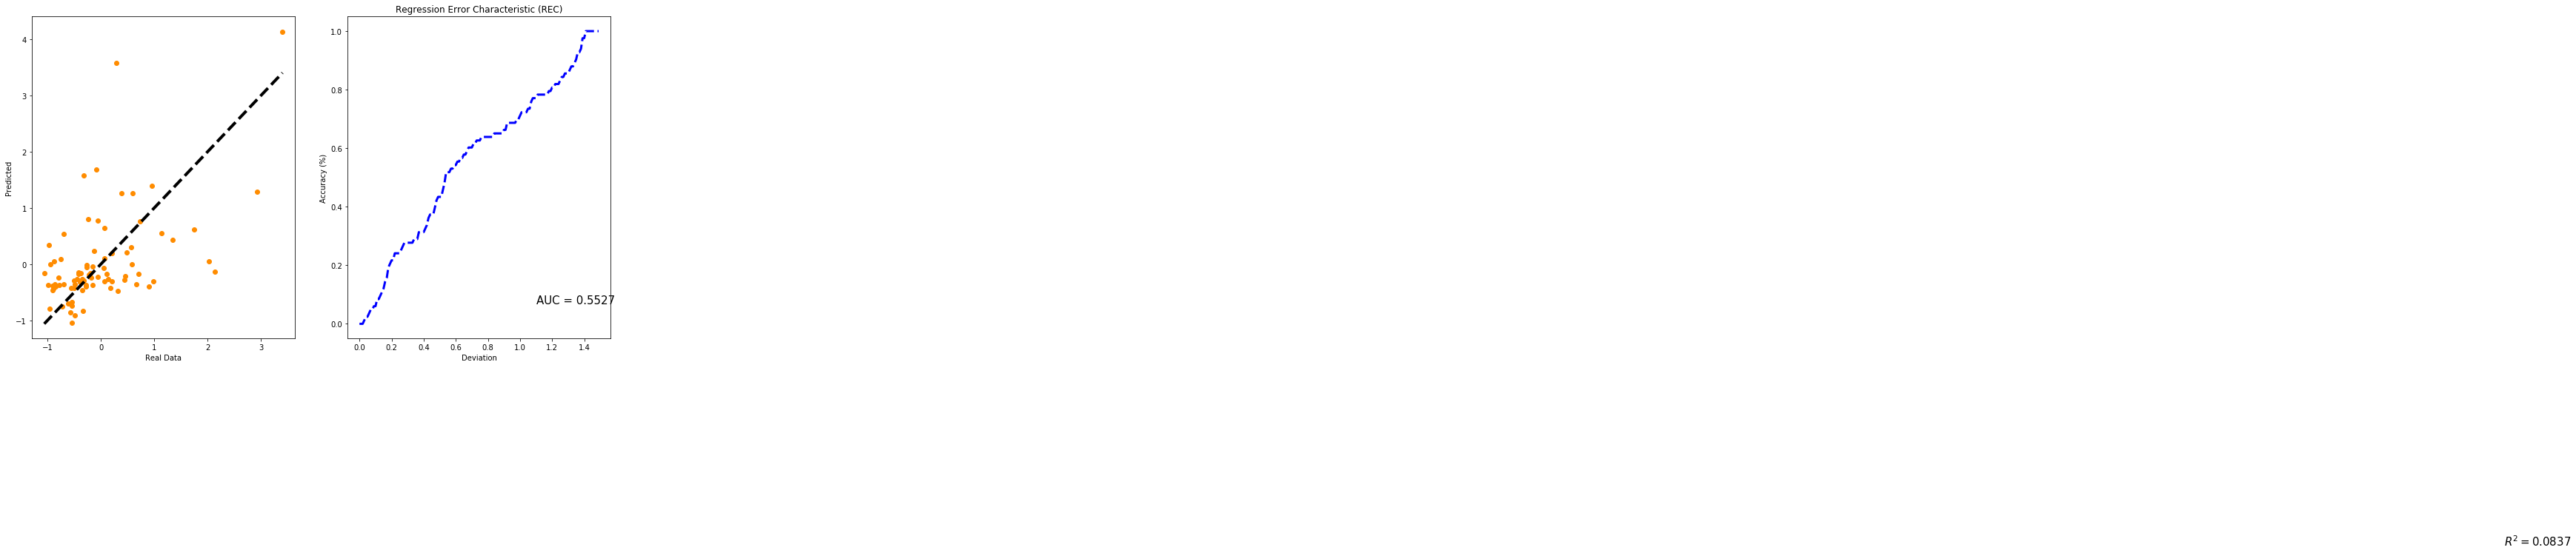

In [31]:
# Plotting
plt.figure(figsize=(14 , 8))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
plt.text(45, -5, r"$R^2 = %0.4f$" %RR , fontsize=15)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()